# Reuters dataset

In [12]:
from keras.datasets import reuters
import numpy as np

In [13]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

### Préparation des données

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [15]:
x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Construction du réseau

In [17]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

###  Création du jeu de données de validation

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Entraînement du réseau

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 67ms/step - loss: 2.5915 - accuracy: 0.4955 - val_loss: 1.7360 - val_accuracy: 0.5950
Epoch 2/20
16/16 [==============================] - 1s 57ms/step - loss: 1.4579 - accuracy: 0.6807 - val_loss: 1.3501 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 1s 56ms/step - loss: 1.1061 - accuracy: 0.7620 - val_loss: 1.1755 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 56ms/step - loss: 0.8766 - accuracy: 0.8137 - val_loss: 1.0729 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 1s 56ms/step - loss: 0.7019 - accuracy: 0.8515 - val_loss: 0.9820 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5623 - accuracy: 0.8827 - val_loss: 0.9409 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 56ms/step - loss: 0.4491 - accuracy: 0.9058 - val_loss: 0.9237 - val_accuracy: 0.8090
Epoch 8/20
16

### Affichage de la perte de l'apprentissage et de la validation

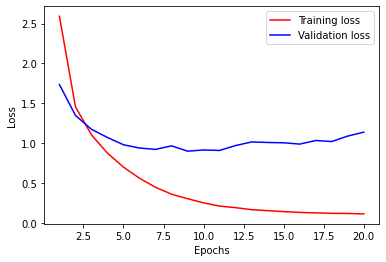

In [21]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Affichage de la précision de l'apprentissage et de la validation

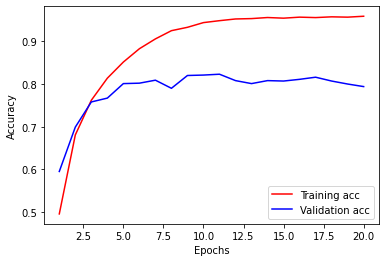

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Réentraîner le modèle pour seulement 9 épisodes

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))



Epoch 1/9
16/16 [==============================] - 2s 66ms/step - loss: 2.6772 - accuracy: 0.5332 - val_loss: 1.7475 - val_accuracy: 0.6440
Epoch 2/9
16/16 [==============================] - 1s 58ms/step - loss: 1.4209 - accuracy: 0.7051 - val_loss: 1.3167 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 56ms/step - loss: 1.0509 - accuracy: 0.7714 - val_loss: 1.1436 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 1s 56ms/step - loss: 0.8220 - accuracy: 0.8235 - val_loss: 1.0652 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 1s 55ms/step - loss: 0.6530 - accuracy: 0.8633 - val_loss: 0.9612 - val_accuracy: 0.8100
Epoch 6/9
16/16 [==============================] - 1s 55ms/step - loss: 0.5153 - accuracy: 0.8939 - val_loss: 0.9248 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 1s 54ms/step - loss: 0.4140 - accuracy: 0.9132 - val_loss: 0.9118 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [24]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 0.9650 - accuracy: 0.7872


In [25]:
results

[0.9649837613105774, 0.7871772050857544]

## Une manière différente de traiter les étiquettes et la perte

### Encodage des étiquettes sous forme de tenseurs d'entiers

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [28]:
model.fit(x_train,y_train,epochs=9,batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 49ms/step - loss: 2.5670 - acc: 0.5202
Epoch 2/9
18/18 [==============================] - 1s 50ms/step - loss: 1.3516 - acc: 0.7177
Epoch 3/9
18/18 [==============================] - 1s 49ms/step - loss: 1.0023 - acc: 0.7835
Epoch 4/9
18/18 [==============================] - 1s 48ms/step - loss: 0.7891 - acc: 0.8317
Epoch 5/9
18/18 [==============================] - 1s 49ms/step - loss: 0.6300 - acc: 0.8652
Epoch 6/9
18/18 [==============================] - 1s 47ms/step - loss: 0.5043 - acc: 0.8914
Epoch 7/9
18/18 [==============================] - 1s 47ms/step - loss: 0.4040 - acc: 0.9127
Epoch 8/9
18/18 [==============================] - 1s 50ms/step - loss: 0.3347 - acc: 0.9297
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9661 - acc: 0.7876


In [29]:
results

[0.9660634994506836, 0.7876224517822266]

### Un réseau avec une couche intermédiaire de taille inférieure de celle de sortie

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 3.4702 - accuracy: 0.1413 - val_loss: 3.0680 - val_accuracy: 0.2810
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 2.6115 - accuracy: 0.3299 - val_loss: 2.1991 - val_accuracy: 0.5600
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 1.7391 - accuracy: 0.6154 - val_loss: 1.5899 - val_accuracy: 0.6080
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.3825 - accuracy: 0.6447 - val_loss: 1.4838 - val_accuracy: 0.6200
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 1.2447 - accuracy: 0.6620 - val_loss: 1.4457 - val_accuracy: 0.6390
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1469 - accuracy: 0.6840 - val_loss: 1.4313 - val_accuracy: 0.6590
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 1.0633 - accuracy: 0.7251 - val_loss: 1.4359 - val_accuracy: 0.6720
Epoch 8/20
63